In [179]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart, rotate
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [328]:
img = cv2.imread("../images/tower.jpg",0)
img = cv2.resize(img,(480,480))
imgo = np.copy(img)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.equalizeHist(img) 
img = cv2.Canny(img,100,200)

# imgo = np.copy(img)
rows,cols = img.shape
M = np.float32([[1,0,50],[0,1,0]])
# img = cv2.warpAffine(img,M,(cols,rows))
# img[:,0:50] = imgo[:,:430:480]
# img = rotate(img, 23,resize=True)
# img = cv2.resize(img,(480,480))

# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


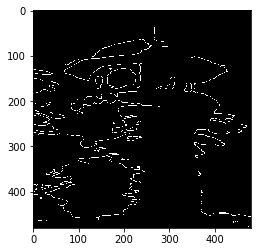

In [332]:
plt.imshow(img, cmap='gray')
# plt.imshow(imgo, cmap='gray')

(480, 180)


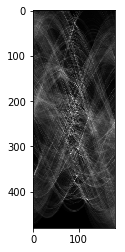

In [307]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
# print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)


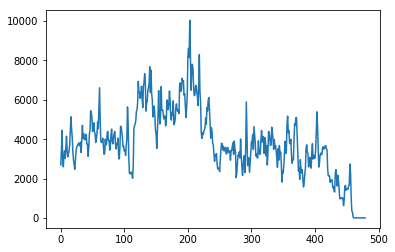

461


In [311]:
b = sinogram1[:,29]
# b[259] = b[259]*2
print(b.shape)
# print(b)
# print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [313]:
'''
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [51,101,151]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):
        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])
            vec[j] = 1 + j
            vec[conv_sz[i] - 1 -j] = -1-j
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    #restrict to center
    ans_m = ans
#     ans_m = ans[30:60]
    center = np.argmin(ans_m)
    min_val = min(ans_m)
#     if center <230 or center > 250:
#         min_val = min_val*10000
        
    min_angles.append(min_val/len(conv_sz))
        
    print('angle: ',k,'Val: ',min_val/len(conv_sz),'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))

'''
min_angles = []
for k in range(180):
    
    b = sinogram1[:,k]
    conv_sz = [51]
    ans = np.zeros(np.shape(b)[0])
    for i in range(len(conv_sz)):

        for j in range(int(conv_sz[i]/2)):
            vec = np.zeros(conv_sz[i])        
            vec[j] = 1 + j
            vec[conv_sz[i] - 1 -j] = -1-j
#         print(vec)
            ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    #restrict to center
    ans_m = ans
    ans_m = ans[200:300]
    center = np.argmin(ans_m) + 200
    min_val = min(ans_m)
#     if center <230 or center > 250:
#         min_val = min_val*10000
        
    min_angles.append(min_val/len(conv_sz))
        
    print('angle: ',k,'Val: ',min_val/len(conv_sz),'At arg: ',center)
    # print(np.shape(ans))
#     print(np.argmin(ans))


angle:  0 Val:  185640.0 At arg:  288
angle:  1 Val:  184875.16827129407 At arg:  287
angle:  2 Val:  194615.28928970988 At arg:  289
angle:  3 Val:  184523.9058044494 At arg:  289
angle:  4 Val:  143904.20109152858 At arg:  291
angle:  5 Val:  163381.77816398794 At arg:  293
angle:  6 Val:  200366.06120052544 At arg:  295
angle:  7 Val:  155042.18084353095 At arg:  298
angle:  8 Val:  144803.83096946703 At arg:  279
angle:  9 Val:  133182.1558709187 At arg:  275
angle:  10 Val:  153816.12091130647 At arg:  279
angle:  11 Val:  162912.28105286934 At arg:  271
angle:  12 Val:  165525.2981616186 At arg:  269
angle:  13 Val:  145763.41884935726 At arg:  273
angle:  14 Val:  121614.83375775827 At arg:  275
angle:  15 Val:  135052.4855862768 At arg:  277
angle:  16 Val:  135771.7894856052 At arg:  279
angle:  17 Val:  172659.62447962997 At arg:  279
angle:  18 Val:  167482.10559486382 At arg:  281
angle:  19 Val:  223914.44675522472 At arg:  283
angle:  20 Val:  237403.6409819716 At arg:  2

In [314]:
# print(min_angles)
print(np.argmin(min_angles))
# for h in range(180):
#     if min_angles[h]<91000:
#         print(h)
#         print(min_angles[h])

29


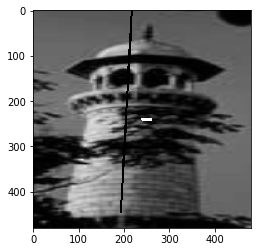

In [318]:
ang = 177
sym_pt = 206

img = cv2.imread("../images/tower.jpg",0)
img = cv2.resize(img,(480,480))
# img = cv2.resize(img,(64,64))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(0,0,0),3)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [105]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 3976.01666667  4191.71258687  4390.57023427  4571.00735922
  4819.85104967  5155.7738808   5524.04136161  5960.92225905
  6412.61780278  6854.12814583  7315.26531394  7792.32931493
  8291.00963541  8757.19891513  9122.43692011  9426.26529559
  9668.67257699  9857.85738166 10012.55180051 10134.8514526
 10250.04765549 10330.8580199  10338.2641037  10267.96035808
 10178.29600978 10138.72924578 10154.91963661 10291.34170646
 10496.95542724 10780.01792859 11168.91496394 11614.83762229
 11983.19209268 12346.08578539 12706.70264915 13059.67942644
 13459.88201998 13983.54800665 14494.30571259 14988.28479531
 15414.69913159 15768.13763891 16122.47832632 16544.5114069
 17163.53416664 17840.15475335 18616.96438118 19714.52290579
 20714.21304127 21486.89907365 21979.00339519 22334.06706465
 22664.26323869 22981.78467825 23166.97528517 23004.42447296
 22733.29109423 22443.92144696 22127.54854038 21721.28793564
 21112.85731594 20263.46871942 19273.0770251  18489.36710366
 18026.1731727  17536.6598

In [190]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

5
54
123
171
176
count 5


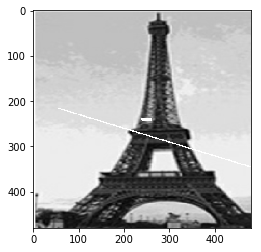

In [266]:
img = cv2.imread("../images/ball90.png",0)
ang = 73
sym_pt = 286
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(1):    
    c0 = np.rint(240*np.cos(((180-ang)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-ang)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(sym_pt + s0,sym_pt - c0),(sym_pt - s0,sym_pt + c0),(255,255,255),2)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')




In [271]:
# img = np.copy(imgo)
# img = cv2.resize(img,(480,480))
# img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
# img = cv2.line(img,(231,480),(231,0),(255,255,255),2)
# plt.imshow(img, cmap='gray')




In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
